In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [3]:
DF = pd.read_csv("C:\\Users\\Admin\\Downloads\\student_habits_performance.csv",index_col=0)
DF.info()
DF.describe()
DF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, S1000 to S1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   i

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


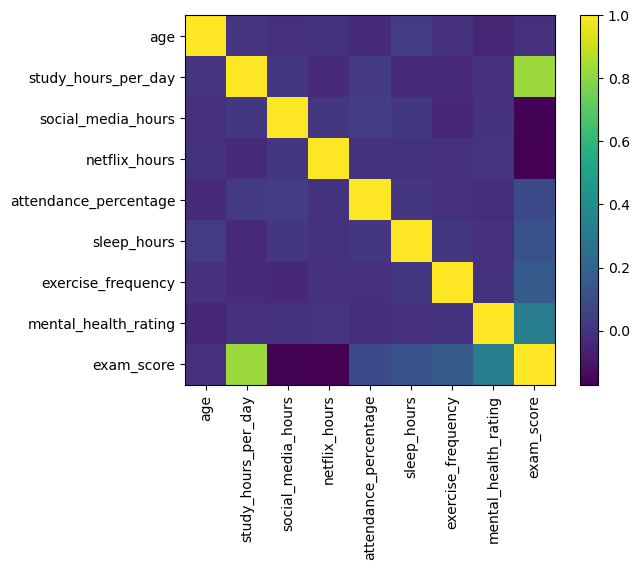

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


In [4]:
numCols = []
catCols =[]
ordinalCols = ['']
for i in DF.columns:
    if DF[i].dtype=='int64'or DF[i].dtype=='float64':
        numCols.append(i)
    elif DF[i].dtype=='object':
        catCols.append(i)
plt.imshow(DF[numCols].corr(),interpolation='nearest')
plt.xticks(range(len(DF[numCols].columns)),DF[numCols].columns,rotation=90)
plt.yticks(range(len(DF[numCols].columns)),DF[numCols].columns)
plt.colorbar()
plt.show()
DF[numCols].corr()

In [30]:

DF['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [ ]:
DF["part_time_job"].value_counts()
import seaborn as sns
#plt.bar(DF['parental_education_level'],DF['part_time_job'])
#sns.barplot(x = "parental_education_level" , y = "mental_health_rating" ,data = DF)
(DF[(DF['mental_health_rating'].map(lambda d:int(d))<5)&DF['parental_education_level'].isna()]) = DF[(DF['mental_health_rating'].map(lambda d:int(d))<5)&DF['parental_education_level'].isna()].fillna('Master')
(DF[(DF['mental_health_rating'].map(lambda d:int(d))>5)&DF['parental_education_level'].isna()]) = DF[(DF['mental_health_rating'].map(lambda d:int(d))>5)&DF['parental_education_level'].isna()].fil

In [ ]:
def reset(i):
    if i==0:
        return None
    else:
        return i
DF[DF['mental_health_rating']>5]['parental_education_level'].map(lambda l:reset(l) )
DF[DF['mental_health_rating']>5]['parental_education_level'].unique()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1095,22,Male,1.7,2.9,2.0,No,97.5,6.0,Good,0,High School,Good,6,No,50.2
S1096,18,Female,6.0,3.6,0.8,No,92.3,7.1,Good,0,High School,Good,3,No,87.9
S1097,20,Male,4.1,2.0,1.0,No,90.4,5.4,Good,5,Bachelor,Average,6,No,80.9
